In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from IPython.display import Image  
from sklearn import tree
import pydotplus

from pandas.plotting import scatter_matrix
import pydotplus


In [2]:
iris = load_iris()


In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.188004
petal length (cm)    3.113179
petal width (cm)     0.582414
dtype: float64

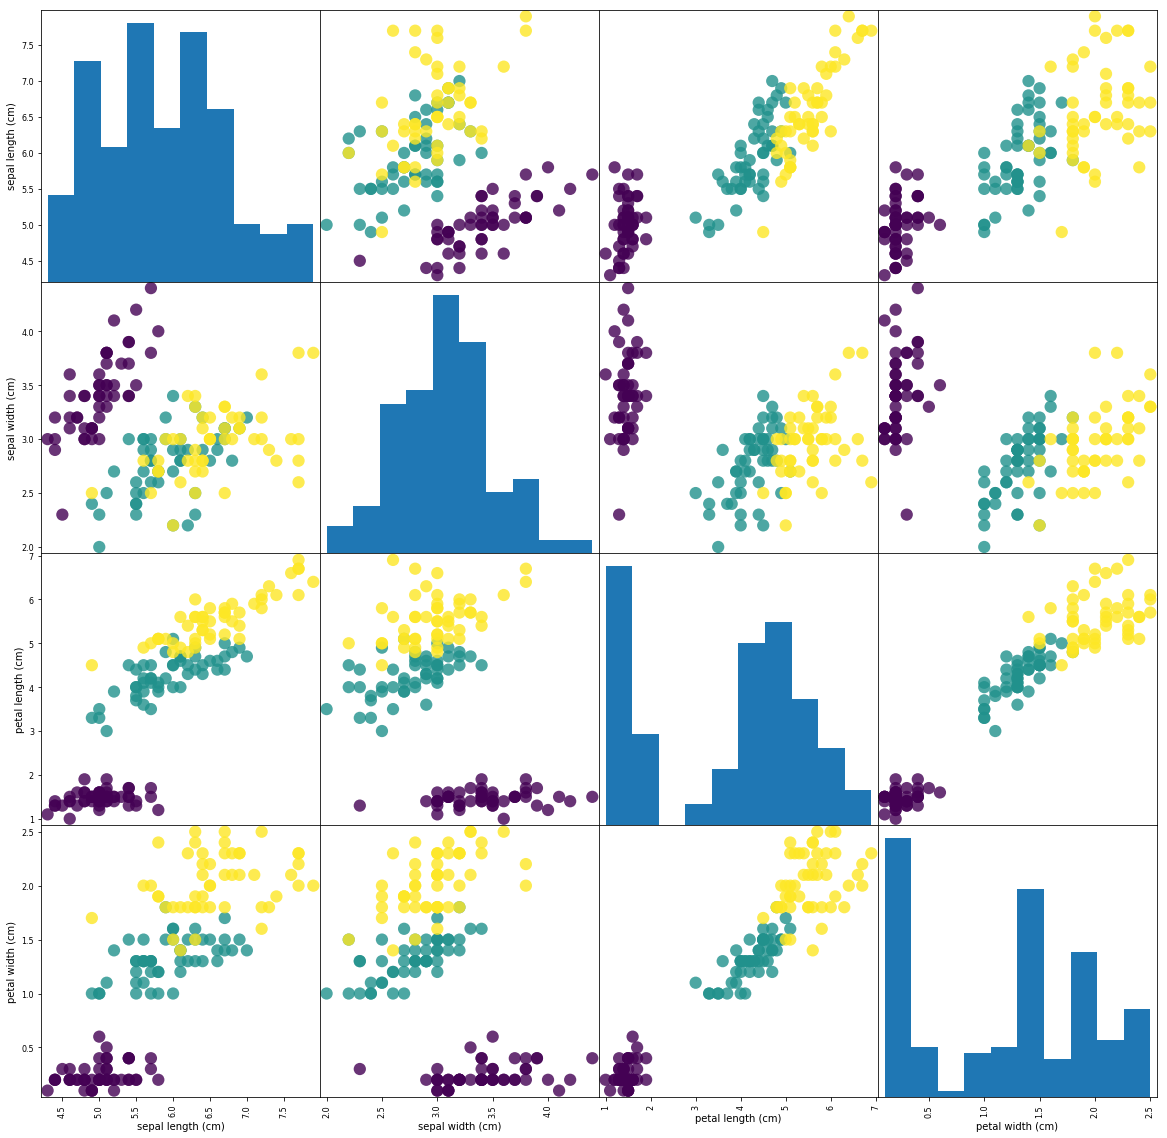

In [8]:
#plt.style.use('ggplot')
scatter_matrix(df, figsize=(20, 20), s=150,c=iris.target,alpha=.8,marker='o')
plt.show()

Text(0.5,1,'Iris classification according to sepal measurements')

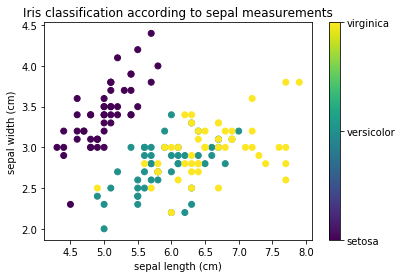

In [9]:
x_index = 0 # Sepal Lenght
y_index = 1 # Sepal Width
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)],)

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target,)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.title("Iris classification according to sepal measurements")


In [28]:
X = iris.data
y = iris.target


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)


In [38]:
clf = DecisionTreeClassifier(random_state=0,max_depth=4,criterion='entropy')
model = clf.fit(X, y)


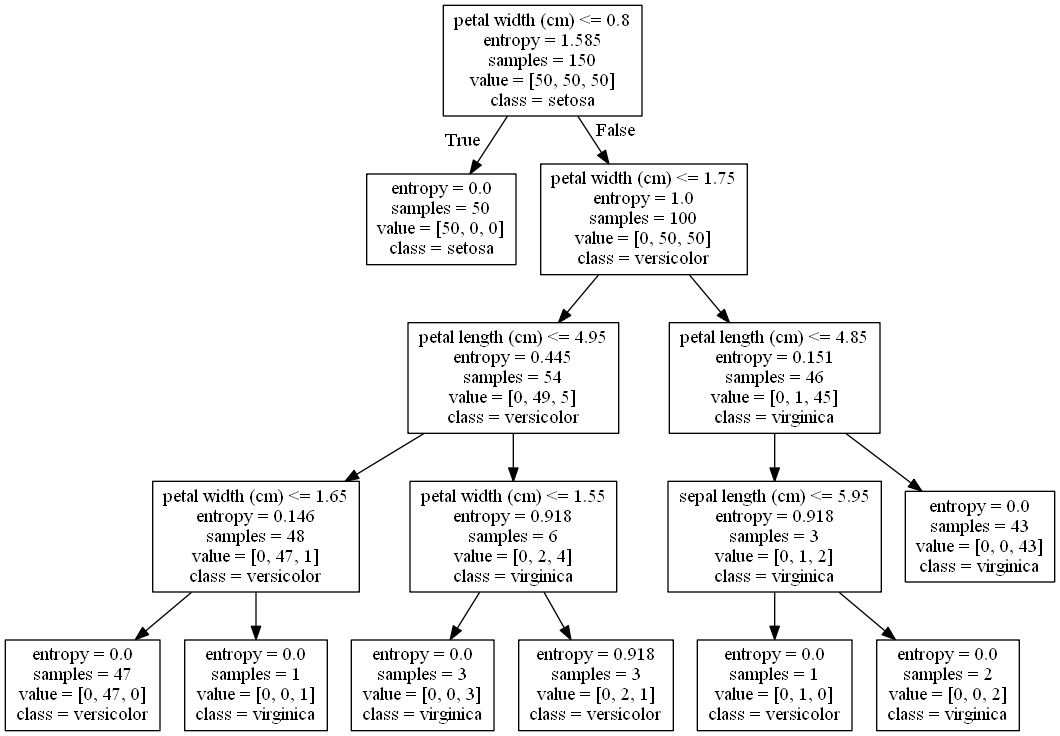

In [39]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())


In [24]:
clf.score(X_test,y_test)

0.9466666666666667

In [25]:
predictions = clf.predict(X_test)
accuracy_score(predictions, y_test)


0.9466666666666667

In [33]:
def plot_class_map(clf, X, y, title="", **params):
    C = 1.0  # SVM regularization parameter

    
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()

    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    #Plot training points as well
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.axis('tight')
    plt.title(title)


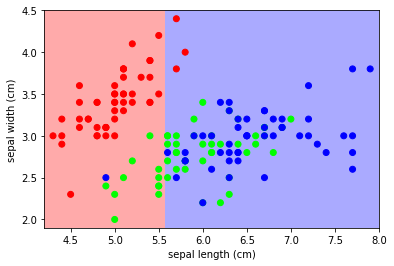

In [37]:
X1 = X[:, :2] 
y1 = y
plot_class_map(clf, X1, y1)


In [264]:
predictions = clf.predict(X_test)
accuracy_score(predictions, y_test)


ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 4 

In [148]:
clf.score(X_test,y_test)

0.9555555555555556

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 4 